# Predicting Coronary Heart Disease using a Random Forest

This project is for analysing data from the famous Framingham heart study (public dataset from the [BioLINCC website](https://biolincc.nhlbi.nih.gov/teaching/)) and predicting a patient's ten year risk of developing coronary heart disease (CHD) based on risk factors.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, I read the data into a dataframe and examine the overall structure of the dataset

In [2]:
# Reading data into dataframe
df = pd.read_csv('Framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


It looks like there are 15 independent variables/risk factors and 1 dependent variable (TenYearCHD).

Categorical variables: male, education, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD

Continuous variables: age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose 

# Exploratory Data Analysis

Next I go deeper and analyse the risk factors and their relationships with each other as well as with the target variable.

First I take a look at the participants of the study.

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

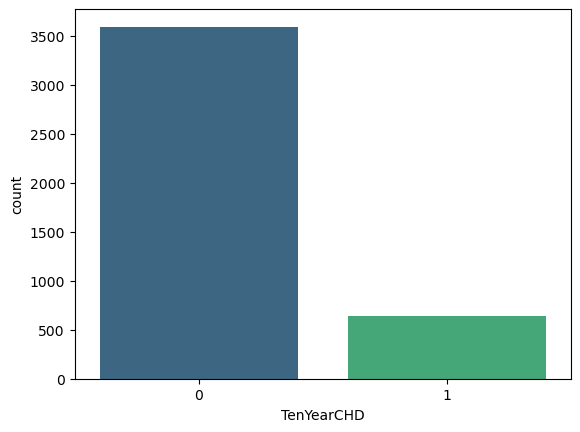

In [6]:
# Number of people in study with CHD
sns.countplot(x='TenYearCHD',data=df,palette='viridis')

<AxesSubplot:xlabel='education', ylabel='count'>

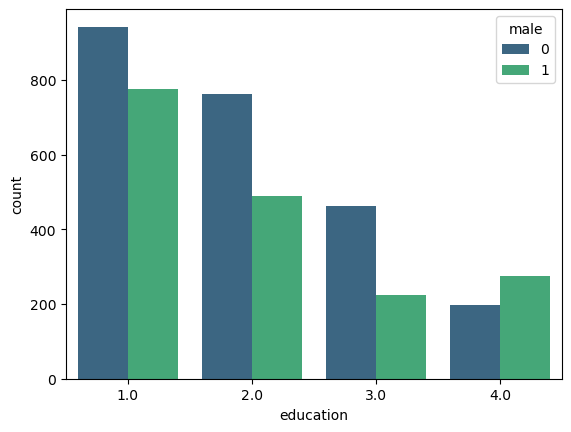

In [7]:
sns.countplot(x='education',hue='male',data=df,palette='viridis')

It seems that there were more female participants than male over most levels of education.
A greater number of participants came from lower levels of education than higher ones.

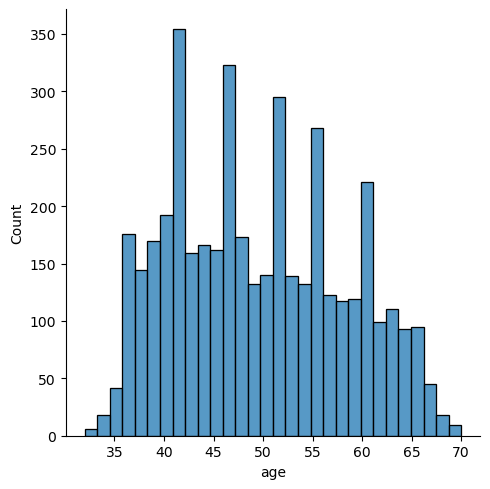

In [8]:
# Age distribution of participants
sns.displot(df['age'],kde=False,bins=30)

Now for the risk factors. First we check out smoking.

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

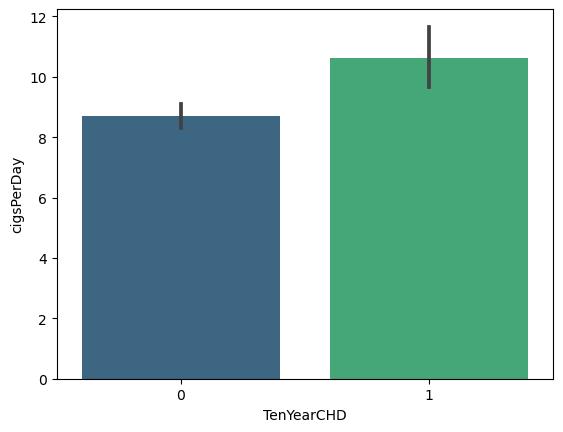

In [9]:
sns.barplot(x='TenYearCHD',y='cigsPerDay',data=df,palette='viridis')

Those who smoked more cigarettes had a greater risk of developing CHD in ten years.

Next we check out age.

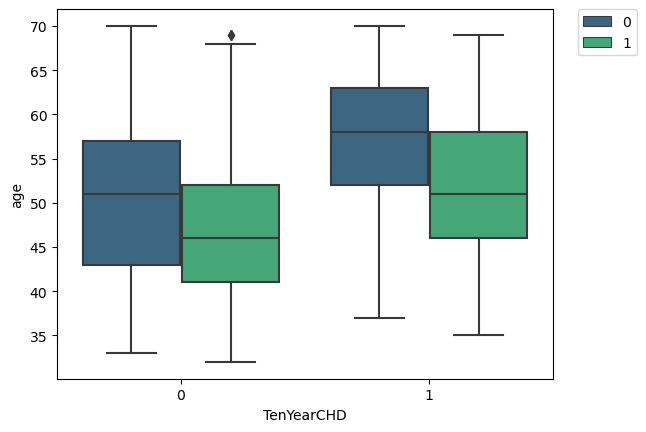

In [10]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It can be seen that older people are at greater risk of CHD.
Also, current smokers are at a greater risk of CHD at an earlier age than non smokers.

Now for diabetes.

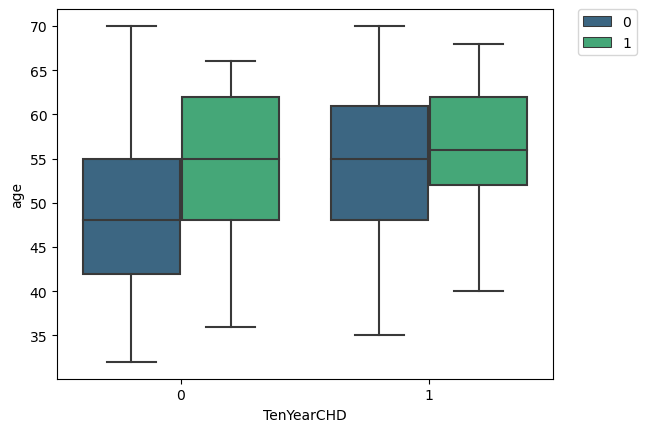

In [11]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, those with 10 year risk of CHD are mostly older than those without, and diabetes afflicts the older people in both groups. 

We check for prevalent hypertension and strokes.

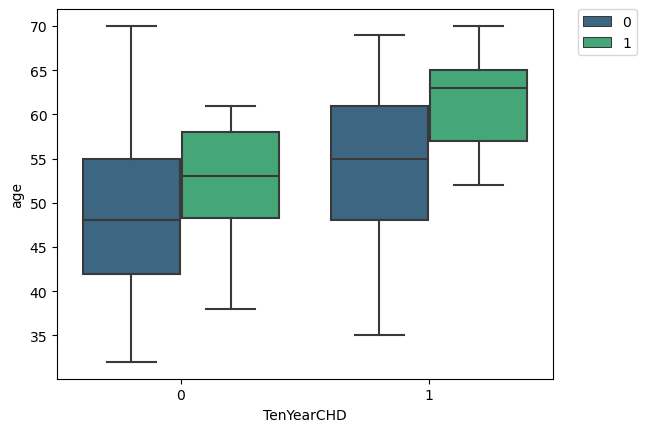

In [12]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

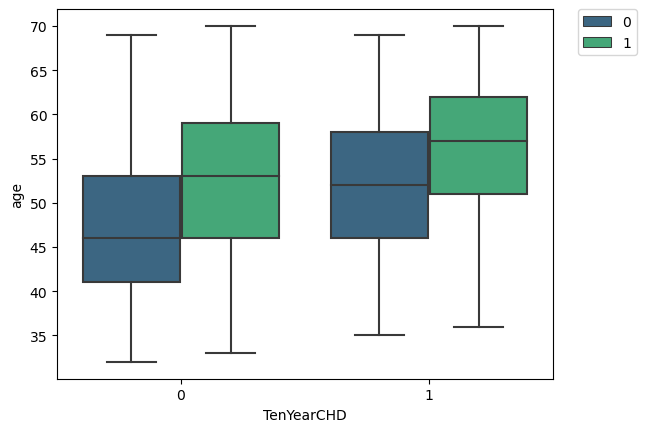

In [13]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentHyp',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Prevalence of both strokes and hypertension increases with age in both at-risk and risk-free groups.

Now for dosage of blood pressure medications.

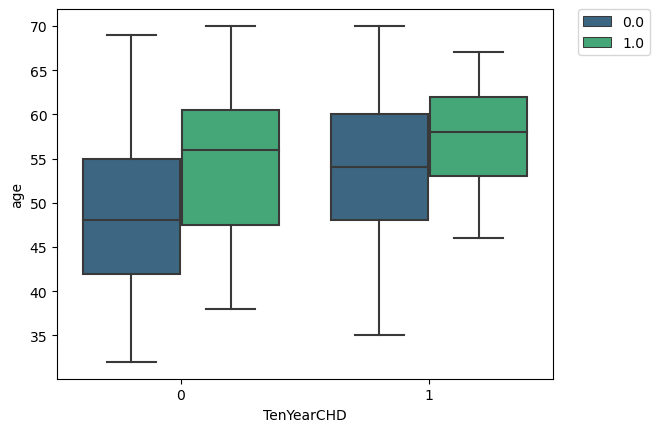

In [14]:
sns.boxplot(x='TenYearCHD',y='age',hue='BPMeds',data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Older people in both groups are more likely to have blood pressure medication.

Now for total cholesterol.

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

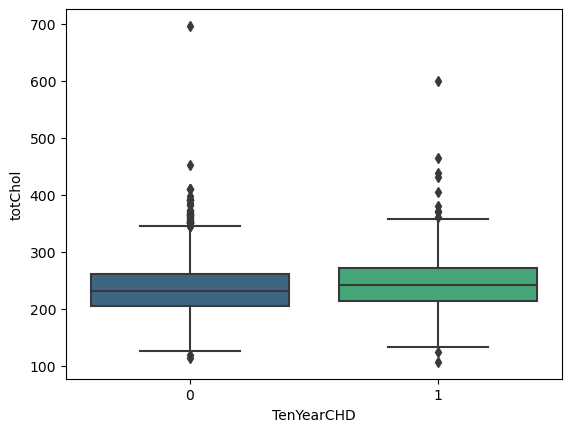

In [15]:
sns.boxplot(x='TenYearCHD',y='totChol',data=df,palette='viridis')

There is a very slight difference in levels, if LDL and HDL were given separately, we might have derived a better link between them and CHD risk.

Now for BMI.

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

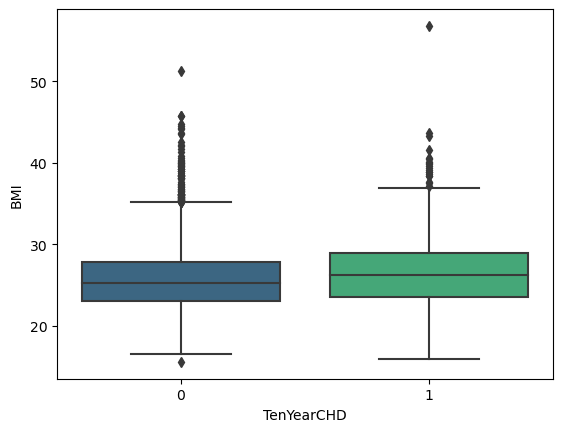

In [16]:
sns.boxplot(x='TenYearCHD',y='BMI',data=df,palette='viridis')


Those with 10 year CHD have slightly higher BMI than those without.

Now for both systolic and diastolic blood pressure.

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

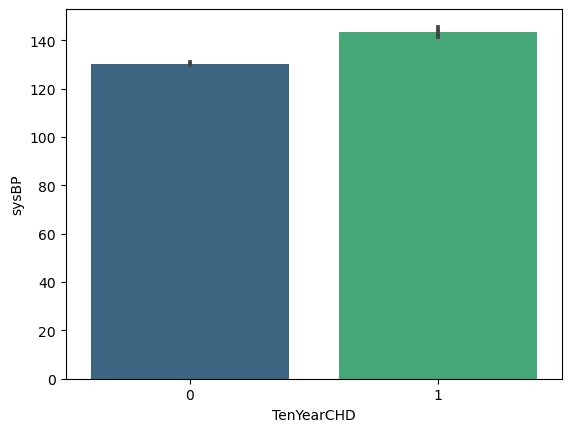

In [17]:
sns.barplot(x='TenYearCHD',y='sysBP',data=df,palette='viridis')

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

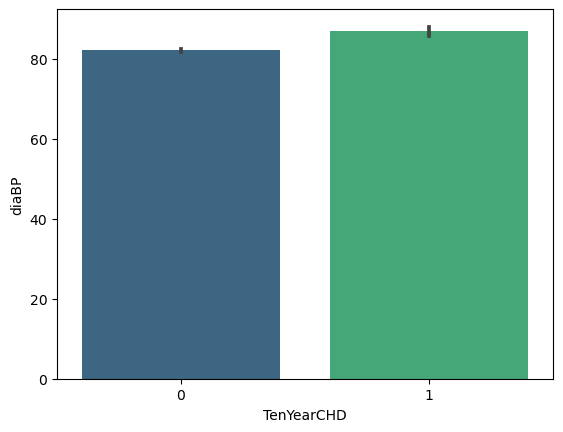

In [18]:
sns.barplot(x='TenYearCHD',y='diaBP',data=df,palette='viridis')

In both cases, at-risk people had slightly higher levels of systolic and diastolic blood pressure.

Finally, we look into the correlation of the factors with each other and the target variable.

<AxesSubplot:>

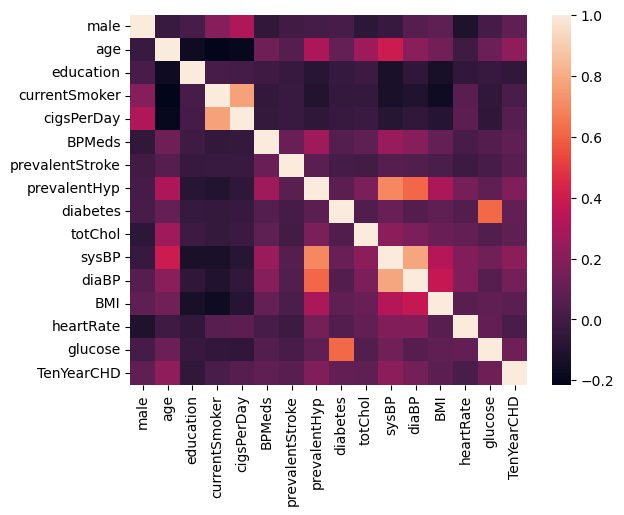

In [19]:
df_corr = df.corr()
sns.heatmap(df_corr)

# Data Cleaning

We handle missing values by deleting or imputing them, as the case may be.

<AxesSubplot:>

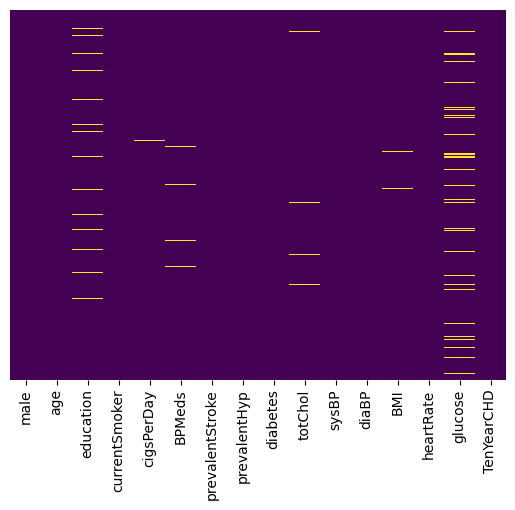

In [20]:
# An overall view of missing values in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# To find number of missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Deleting missing values

First, we identify and delete the null values from those columns where they take up less than 5% of the data.

In [22]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

We compare the old and new dataframes to see if it's safe for deletion (i.e., overall dataset is not distorted). For numerical data, that means comparing their distributions.

In [23]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((4240, 16), (3989, 6))

<AxesSubplot:>

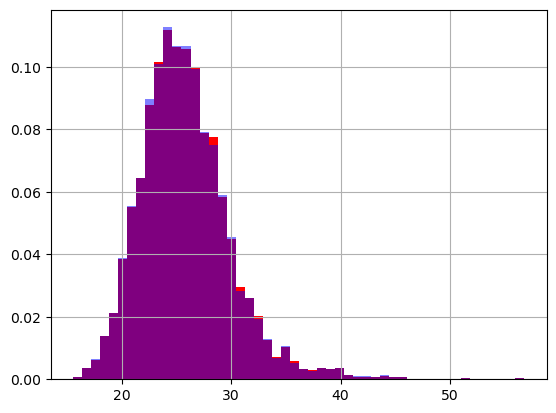

In [24]:
#BMI
#original data
df['BMI'].hist(bins = 50,density = True , color = 'red')

#new data
new_df['BMI'].hist(bins = 50,density = True , color = 'blue' , alpha = 0.5)

<AxesSubplot:>

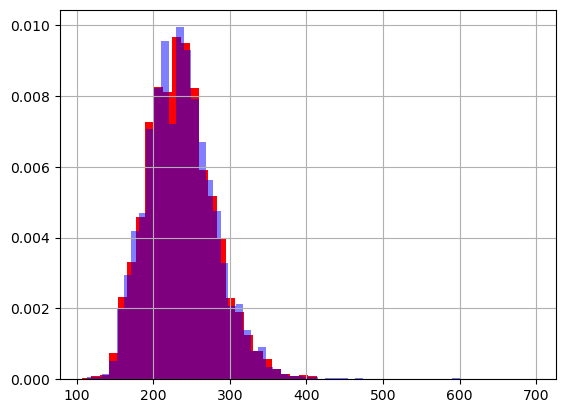

In [25]:
#totChol
#original data
df['totChol'].hist(bins = 50,density = True , color = 'red')

#new data
new_df['totChol'].hist(bins = 50,density = True , color = 'blue' , alpha = 0.5)

<AxesSubplot:>

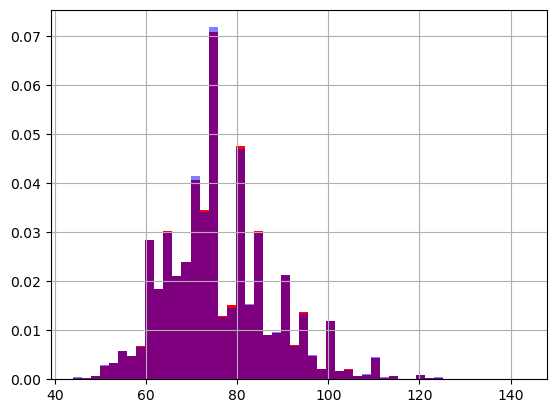

In [26]:
#heartRate
#original data
df['heartRate'].hist(bins = 50,density = True , color = 'red')

#new data
new_df['heartRate'].hist(bins = 50,density = True , color = 'blue' , alpha = 0.5)

Since the distributions are comparable, we move ahead with deletion 

In [27]:
df.dropna(subset = cols, inplace = True)

In [28]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64

I shall now impute the remaining column glucose with its mean.

In [29]:
mean = df['glucose'].mean()
df['glucose'] = df['glucose'].fillna(mean)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [30]:
#Checking for any duplicated rows
df.duplicated().any()

False

# Building the Machine Learning model - Random Forest

First, I drop the education column as it is not a reliable predictor of ten year CHD.

In [31]:
df.drop('education',axis=1,inplace=True)

I then find the number of people with and without ten year CHD risk (our target variable). I use this info to get a baseline accuracy which my model will have to beat. 

In [32]:
df['TenYearCHD'].value_counts()

0    3394
1     595
Name: TenYearCHD, dtype: int64

In [33]:
#Baseline accuracy
3394/(3394+595)

0.8508398094760592

The accuracy is 85%. Now I split the dataset into training and testing data.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#Splitting into training and testing data
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

However, the data is imbalanced with the majority of people having no 10 year risk of CHD. To make sure my model is not biased, I perform both oversampling and undersampling of the data  before splitting it.

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [37]:
oversample = RandomOverSampler(sampling_strategy = 0.3)
undersample = RandomUnderSampler(sampling_strategy = 0.8)
X_over, y_over = oversample.fit_resample(X, y)
X_both, y_both = undersample.fit_resample(X_over,y_over)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.3)

Now the data is ready to be fed into my model, a random forest. 

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)

In [39]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

I shall now evaluate the performance of my model.

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1014
           1       0.88      0.65      0.75       310

    accuracy                           0.90      1324
   macro avg       0.89      0.81      0.84      1324
weighted avg       0.90      0.90      0.89      1324



The model has good values of precision, recall and accuracy - which at 90% beats the baseline. 

Thus I have successfully built a random forest classifier to predict 10 year risk of CHD!

# Thank you!